In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

qwen3_4b_4bit_training_path = "local/output/runs/current/events.out.tfevents.1750819674.r1-distil-qapo-rollout-only-v1-0.302243.0"

In [2]:
ea = EventAccumulator(qwen3_4b_4bit_training_path)
ea.Reload()

print(ea.Tags()["scalars"])

['train/loss', 'train/grad_norm', 'train/learning_rate', 'train/num_tokens', 'train/mean_token_accuracy', 'train/epoch', 'eval/loss', 'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second', 'eval/num_tokens', 'eval/mean_token_accuracy', 'train/train_runtime', 'train/train_samples_per_second', 'train/train_steps_per_second', 'train/total_flos', 'train/train_loss']


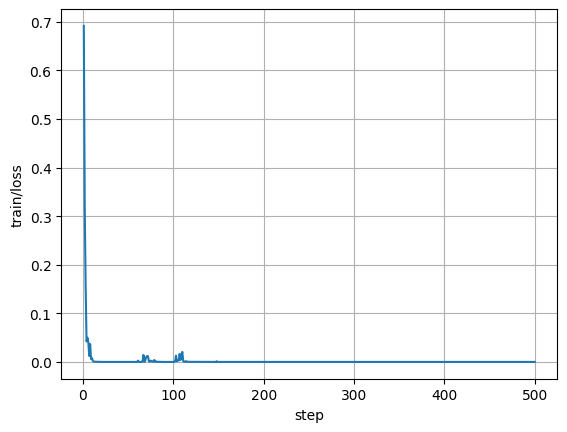

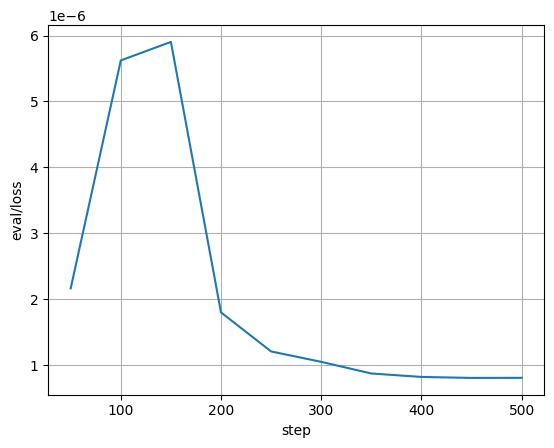

In [8]:
import matplotlib.pyplot as plt
import numpy as np

for key in ["train/loss", "eval/loss"]:
    step = np.array([event.step for event in ea.Scalars(key)])
    value = np.array([event.value for event in ea.Scalars(key)])
    plt.plot(step, value)
    plt.grid()
    plt.xlabel("step")
    plt.ylabel(key)
    plt.show()